<a href="https://colab.research.google.com/github/codes-by-pinewood/IAAM_Practical4/blob/main/IAAM_Practical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diplib --quiet
#import necessary packages
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
from diplib import MeasurementTool as Tool
from diplib import Threshold, Label

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 13.9 MB/s eta 0:00:00
DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [ ]:
# mount to internal image files
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/ImageAnalysis/'

Mounted at /content/drive/


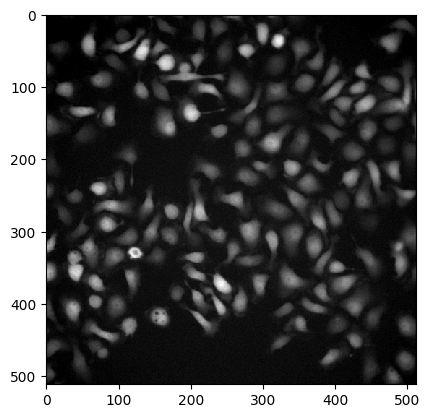

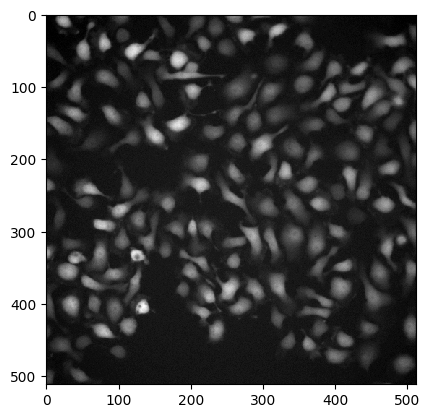

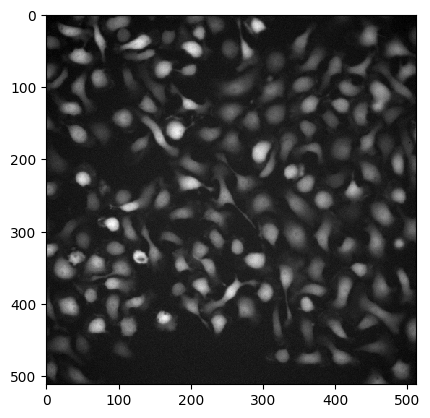

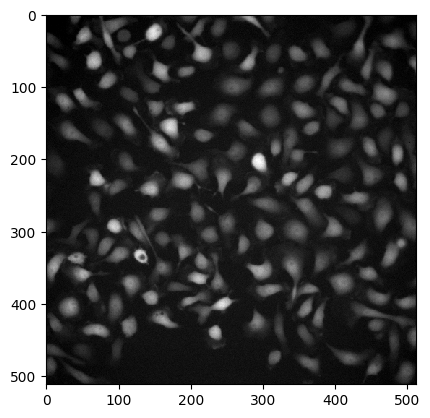

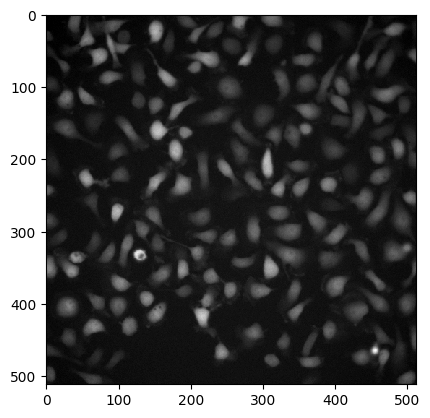

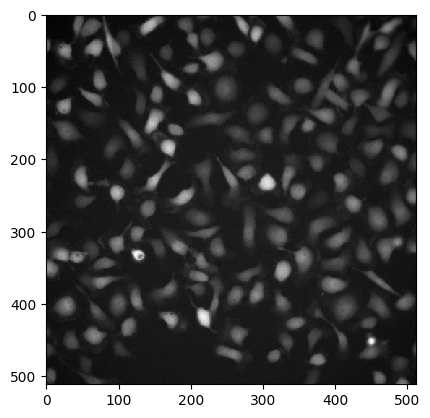

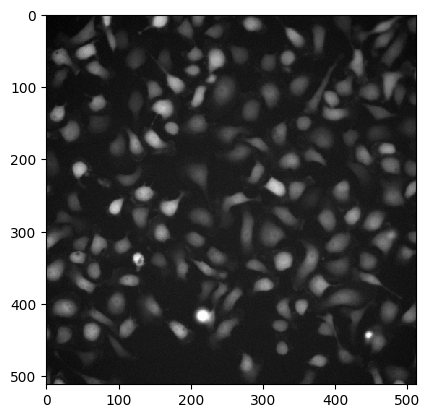

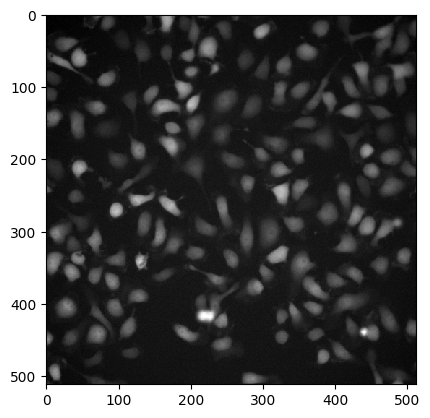

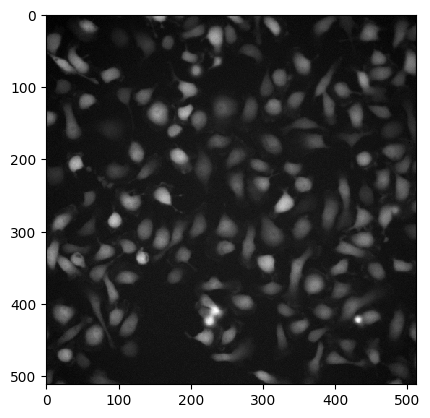

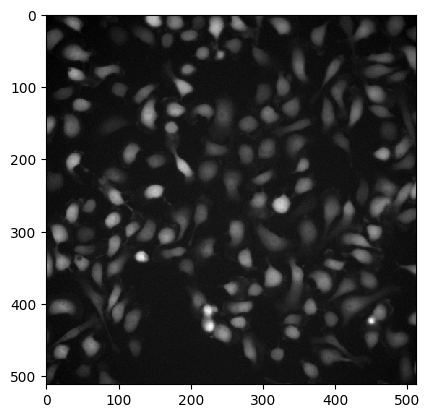

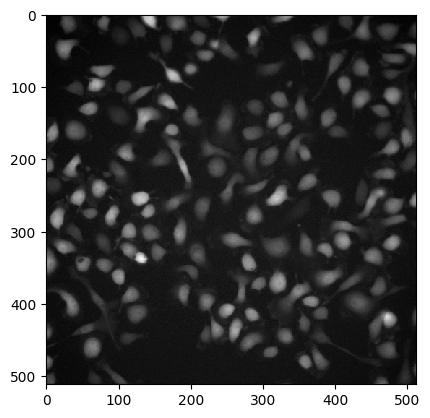

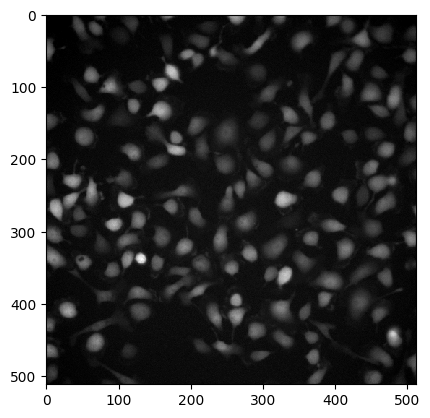

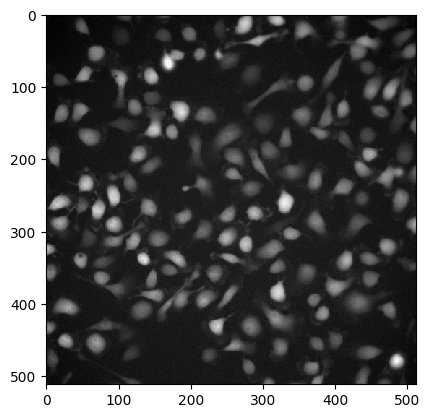

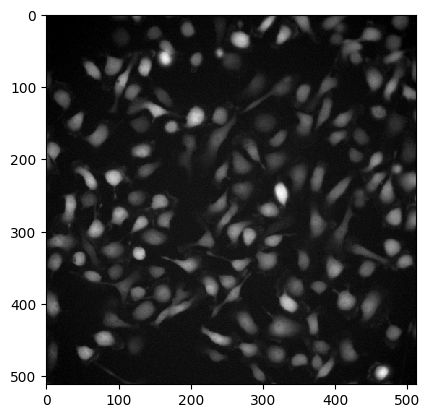

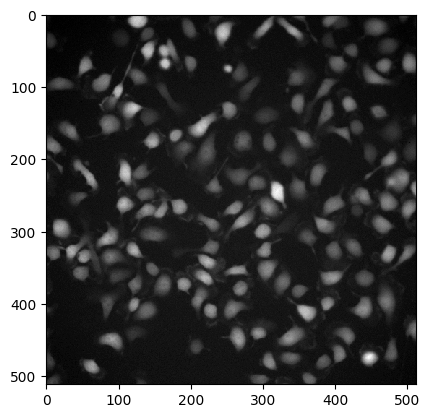

In [ ]:
a_1 = dip.ImageReadTIFF(path + "MTLn3+EGF0001.tif")
a_1.Show()

a_2 = dip.ImageReadTIFF(path + "MTLn3+EGF0002.tif")
a_2.Show()

a_3 = dip.ImageReadTIFF(path + "MTLn3+EGF0003.tif")
a_3.Show()

a_4 = dip.ImageReadTIFF(path + "MTLn3+EGF0004.tif")
a_4.Show()

a_5= dip.ImageReadTIFF(path + "MTLn3+EGF0005.tif")
a_5.Show()

a_6 = dip.ImageReadTIFF(path + "MTLn3+EGF0006.tif")
a_6.Show()

a_7 = dip.ImageReadTIFF(path + "MTLn3+EGF0007.tif")
a_7.Show()

a_8 = dip.ImageReadTIFF(path + "MTLn3+EGF0008.tif")
a_8.Show()

a_9 = dip.ImageReadTIFF(path + "MTLn3+EGF0009.tif")
a_9.Show()

a_10 = dip.ImageReadTIFF(path + "MTLn3+EGF0010.tif")
a_10.Show()

a_11 = dip.ImageReadTIFF(path + "MTLn3+EGF0011.tif")
a_11.Show()

a_12 = dip.ImageReadTIFF(path + "MTLn3+EGF0012.tif")
a_12.Show()

a_13 = dip.ImageReadTIFF(path + "MTLn3+EGF0013.tif")
a_13.Show()

a_14 = dip.ImageReadTIFF(path + "MTLn3+EGF0014.tif")
a_14.Show()

a_15 = dip.ImageReadTIFF(path + "MTLn3+EGF0015.tif")
a_15.Show()


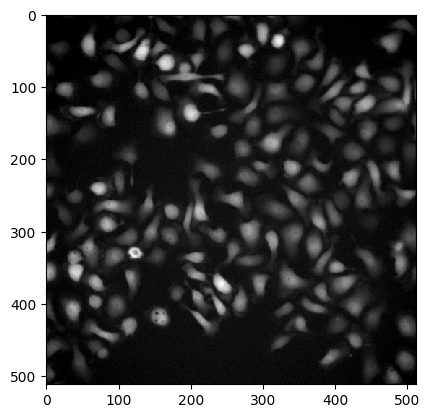

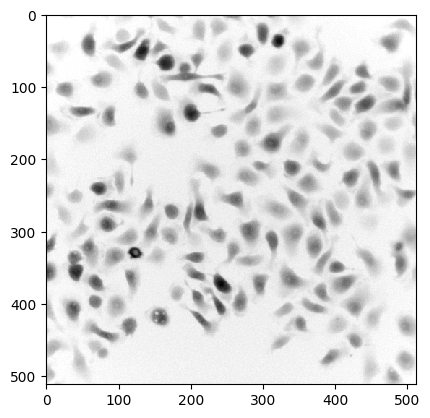

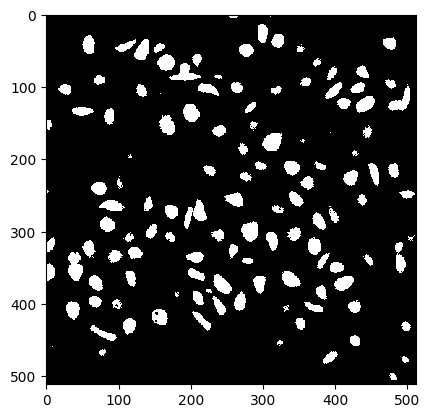

RuntimeError: Image is not binary
in function: void dip::BinaryPropagation(const dip::Image&, const dip::Image&, dip::Image&, dip::sint, dip::uint, const String&) (/diplib/src/binary/binary_propagation.cpp at line number 311)
in function: void dip::EdgeObjectsRemove(const dip::Image&, dip::Image&, dip::uint) (/diplib/include/diplib/binary.h at line number 320)

In [126]:
a_1_arr = np.array(a_1)

gray_image = np.mean(a_1_arr, axis=2)

gray_image_dip = dip.Image(gray_image)

gray_image_dip.Show()

inverted = dip.Invert(gray_image_dip)

inverted.Show()

inverted_cs = dip.MorphologicalSharpening(inverted)


ms = dip.MultipleThresholds(gray_image_dip, [0, 15000])
#inverted_cs.Show()

ms.Show()

edge_rm =dip.EdgeObjectsRemove(ms)

edge_rm.Show()

#threshold = dip.Threshold(ms)
threshold = Label(dip.EdgeObjectsRemove(ms > 200), minSize = 1)
threshold_value_b2 = Label(dip.EdgeObjectsRemove(b2<100), minSize= 40)
threshold_value_b3 = Label(dip.EdgeObjectsRemove(b3<100), minSize= 40)
threshold_value_b4 = Label(dip.EdgeObjectsRemove(b4<100), minSize= 40)


threshold.Show()

m_b1 = Tool.Measure(threshold, gray_image_dip, ['Center', 'Size','Perimeter'])

print(m_b1)

#gray_image_dip.Show()
#image_thresh = dip.VolumeThreshold(gray_image_dip, 0.5)

#image_thresh.Show()

#image_dilated = dip.Dilation(gray_image_dip)

#image_dilated.Show()




In [77]:
#im_tif_e = dip.Erosion(imtif1_dilated)

#labeled = dip.Label(image_thresh)
msr1 = Tool.Measure(image_thresh, gray_image_dip, ['Center', 'Gravity', 'Size'])
print(msr1)

#check = dip.SmallObjectsRemove(image_thresh, 10000, 1)
#image_thresh.Show()
#check.Show()

  |                  Center |                 Gravity |       Size | 
- | ----------------------- | ----------------------- | ---------- | 
  |       dim0 |       dim1 |       dim0 |       dim1 |            | 
  |       (px) |       (px) |       (px) |       (px) |      (px²) | 
- | ---------- | ---------- | ---------- | ---------- | ---------- | 
1 |      236.8 |      249.4 |      239.6 |      280.8 |  8.343e+04 | 
2 |      258.4 |      271.0 |      260.1 |      268.7 |  8.118e+04 | 
3 |      274.7 |      250.5 |      274.8 |      250.1 |  2.779e+04 | 
4 |      274.7 |      242.2 |      274.8 |      242.1 |  1.727e+04 | 
5 |      272.7 |      248.1 |      272.6 |      248.1 |  1.536e+04 | 
6 |      278.2 |      246.4 |      278.4 |      246.5 |      9197. | 
7 |      254.9 |      249.2 |      247.0 |      247.1 |  2.791e+04 | 



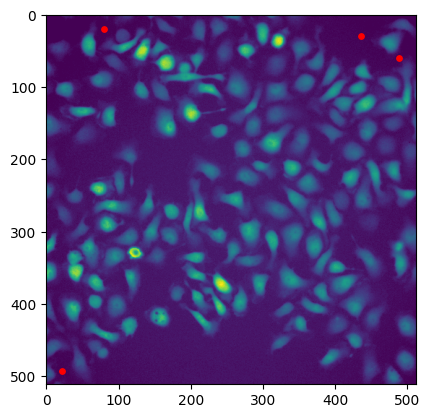

In [89]:
implot = plt.imshow(gray_image_dip)


# put a red dot, size 40, at 2 locations:
plt.scatter(x=80.05, y=19.55, c='r', s=15)
plt.scatter(x=435.8, y=28.72, c='r', s=15)
plt.scatter(x=488.3, y=59.10, c='r', s=15)
plt.scatter(x=22.22, y=493.3, c='r', s=15)
#print(mask_a2[1872][1875])

plt.show()